In [101]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import OLSInfluence
import time
start_time = time.time()


In [102]:
# Load the dataset (Update this path as needed)
clouds = pd.read_csv('/Users/rahulkisandabilkar/Downloads/clouds.csv')


In [103]:
# Boxplots of Rainfall vs Seeding and Echo Motion
# plt.figure(figsize=(10, 6))

Text(0, 0.5, 'Rainfall')

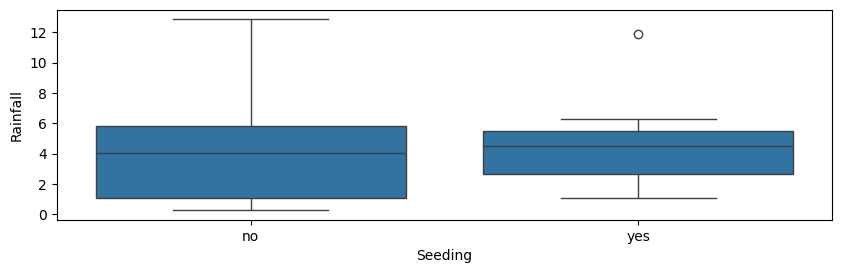

In [104]:
# Boxplots of Rainfall vs Seeding and Echo Motion
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.boxplot(x='seeding', y='rainfall', data=clouds)
plt.xlabel("Seeding")
plt.ylabel("Rainfall")

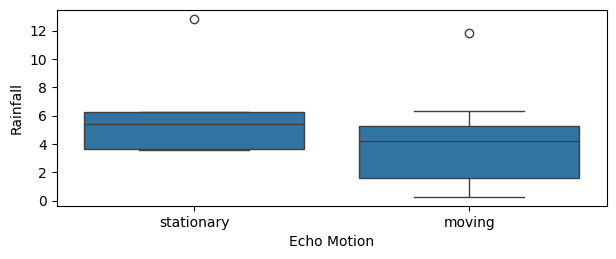

In [105]:
plt.subplot(2, 1, 2)
sns.boxplot(x='echomotion', y='rainfall', data=clouds)
plt.xlabel("Echo Motion")
plt.ylabel("Rainfall")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Rainfall')

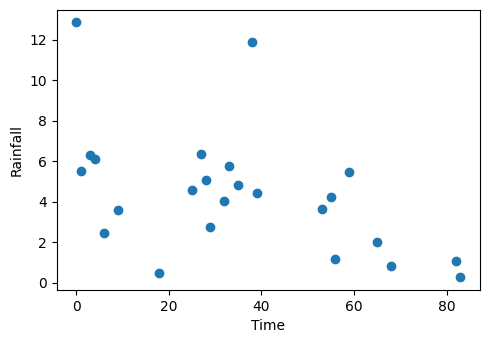

In [106]:
# Scatter plots for continuous covariates
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(clouds['time'], clouds['rainfall'])
plt.xlabel('Time')
plt.ylabel('Rainfall')

Text(0, 0.5, 'Rainfall')

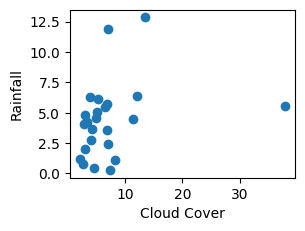

In [107]:
plt.subplot(2, 2, 2)
plt.scatter(clouds['cloudcover'], clouds['rainfall'])
plt.xlabel('Cloud Cover')
plt.ylabel('Rainfall')

Text(0, 0.5, 'Rainfall')

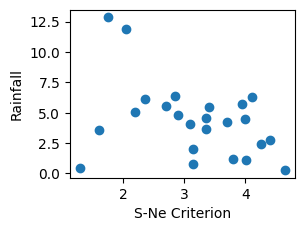

In [108]:
plt.subplot(2, 2, 3)
plt.scatter(clouds['sne'], clouds['rainfall'])
plt.xlabel('S-Ne Criterion')
plt.ylabel('Rainfall')

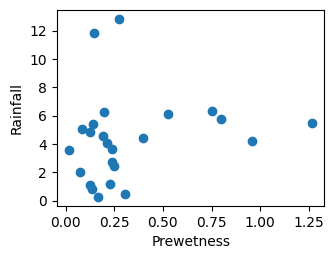

In [109]:
plt.subplot(2, 2, 4)
plt.scatter(clouds['prewetness'], clouds['rainfall'])
plt.xlabel('Prewetness')
plt.ylabel('Rainfall')
plt.tight_layout()
plt.show()

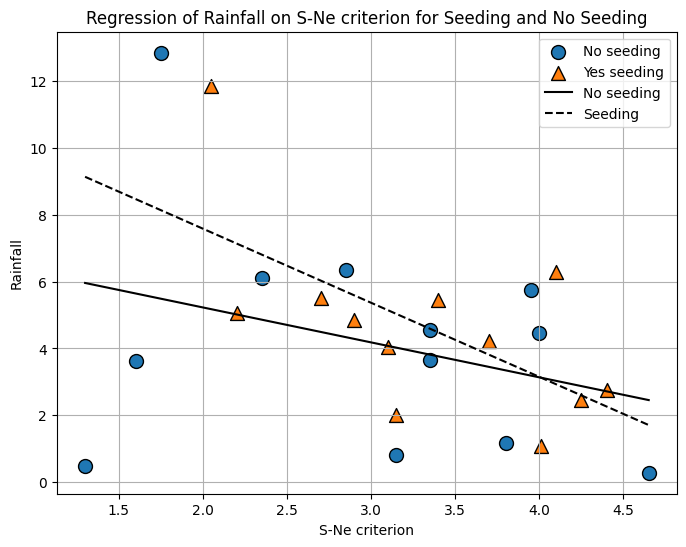

In [110]:
plt.figure(figsize=(8, 6))

# Symbols for 'seeding' groups
psymb = np.where(clouds['seeding'] == 'yes', '^', 'o')

# Plotting the points with different markers for 'seeding' and 'no seeding'
for symbol, group in clouds.groupby('seeding'):
    plt.scatter(group['sne'], group['rainfall'], label=f"{symbol.capitalize()} seeding",
                marker='^' if symbol == 'yes' else 'o', edgecolor='black', s=100)

# Fitting and plotting regression lines for both 'seeding' groups
# Subset the data
no_seeding = clouds[clouds['seeding'] == 'no']
seeding = clouds[clouds['seeding'] == 'yes']

# Fit linear models using statsmodels for both seeding groups
no_seeding_model = sm.OLS(no_seeding['rainfall'], sm.add_constant(no_seeding['sne'])).fit()
seeding_model = sm.OLS(seeding['rainfall'], sm.add_constant(seeding['sne'])).fit()

# Add regression lines
sne_vals = np.linspace(clouds['sne'].min(), clouds['sne'].max(), 100)
plt.plot(sne_vals, no_seeding_model.predict(sm.add_constant(sne_vals)), linestyle='-', color='black', label="No seeding")
plt.plot(sne_vals, seeding_model.predict(sm.add_constant(sne_vals)), linestyle='--', color='black', label="Seeding")

# Customizing the plot
plt.xlabel('S-Ne criterion')
plt.ylabel('Rainfall')
plt.legend(loc='upper right')
plt.title('Regression of Rainfall on S-Ne criterion for Seeding and No Seeding')
plt.grid(True)

# Show the plot
plt.show()


In [111]:
# Create the design matrix and target variable
clouds_formula = 'rainfall ~ seeding * (sne + cloudcover + prewetness + echomotion) + time'
model = sm.OLS.from_formula(clouds_formula, data=clouds)


In [112]:
# Fit the linear model
results = model.fit()

In [113]:
# Print the summary of the linear model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               rainfall   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     3.274
Date:                Wed, 09 Oct 2024   Prob (F-statistic):             0.0243
Time:                        08:26:27   Log-Likelihood:                -45.671
No. Observations:                  24   AIC:                             113.3
Df Residuals:                      13   BIC:                             126.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [114]:
# Extract the coefficients
print("\nCoefficients:")
print(results.params)


Coefficients:
Intercept                                  -0.346241
seeding[T.yes]                             15.682935
echomotion[T.stationary]                    3.152814
seeding[T.yes]:echomotion[T.stationary]    -0.562218
sne                                         0.419814
seeding[T.yes]:sne                         -3.197190
cloudcover                                  0.387862
seeding[T.yes]:cloudcover                  -0.486255
prewetness                                  4.108342
seeding[T.yes]:prewetness                  -2.557067
time                                       -0.044974
dtype: float64


In [115]:
# Extract the covariance matrix
print("\nCovariance Matrix:")
print(results.cov_params())


Covariance Matrix:
                                         Intercept  seeding[T.yes]  \
Intercept                                 7.771461       -7.832674   
seeding[T.yes]                           -7.832674       19.769282   
echomotion[T.stationary]                 -2.501743        2.376291   
seeding[T.yes]:echomotion[T.stationary]   2.512665       -1.863424   
sne                                      -1.644959        2.246895   
seeding[T.yes]:sne                        1.646503       -5.130202   
cloudcover                               -0.143397        0.105044   
seeding[T.yes]:cloudcover                 0.144605       -0.264132   
prewetness                               -2.551560        1.481898   
seeding[T.yes]:prewetness                 2.555577       -0.238001   
time                                      0.001211       -0.032944   

                                         echomotion[T.stationary]  \
Intercept                                               -2.501743   
s

In [116]:
# Regression diagnostics - Residuals and fitted values
clouds_resid = results.resid
clouds_fitted = results.fittedvalues


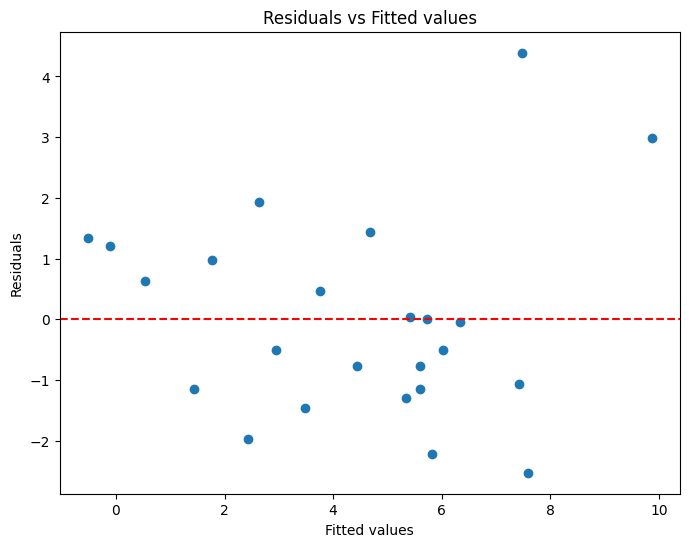

In [117]:
# Plot residuals vs fitted values
plt.figure(figsize=(8, 6))
plt.scatter(clouds_fitted, clouds_resid)
plt.axhline(0, linestyle='--', color='r')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()


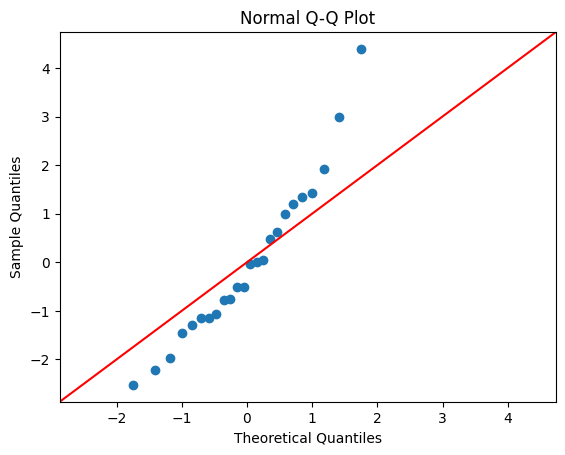

In [118]:
# Normal probability plot of residuals
sm.qqplot(clouds_resid, line='45')
plt.title('Normal Q-Q Plot')
plt.show()


In [119]:
# Plot Cook's distance
influence = OLSInfluence(results)
(c, p) = influence.cooks_distance


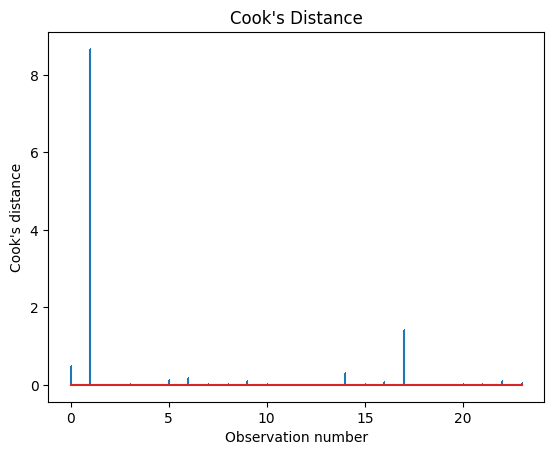

In [120]:
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("Cook's Distance")
plt.xlabel('Observation number')
plt.ylabel("Cook's distance")
plt.show()

In [121]:
end_time = time.time()
total_time = end_time - start_time
print(f"Total Execution Time: {total_time} seconds")


Total Execution Time: 0.5243961811065674 seconds
